# IMPORT LIBRARY YANG DIPERLUKAN

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load Data Iris

In [49]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

#merubah nama kolom agar mudah
df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 
                   'petal width (cm)': 'petal_width'}, inplace=True)

# Map target integers to species names
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [35]:
df[:10]

,sepal_length,sepal_width,petal_length,spetal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


In [50]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


# EDA

<Axes: xlabel='species'>

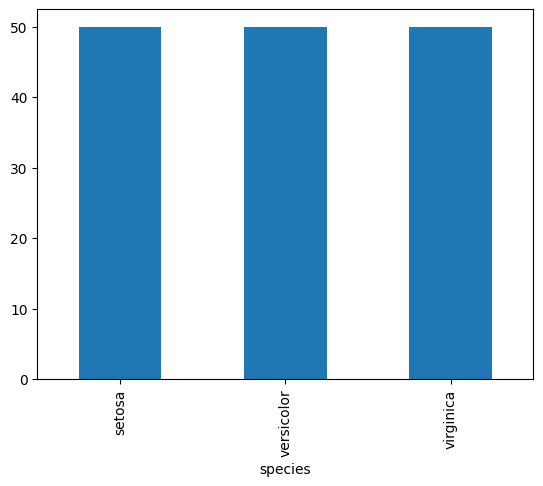

In [108]:
jml_category = df.species.value_counts()
jml_category.plot(kind='bar')

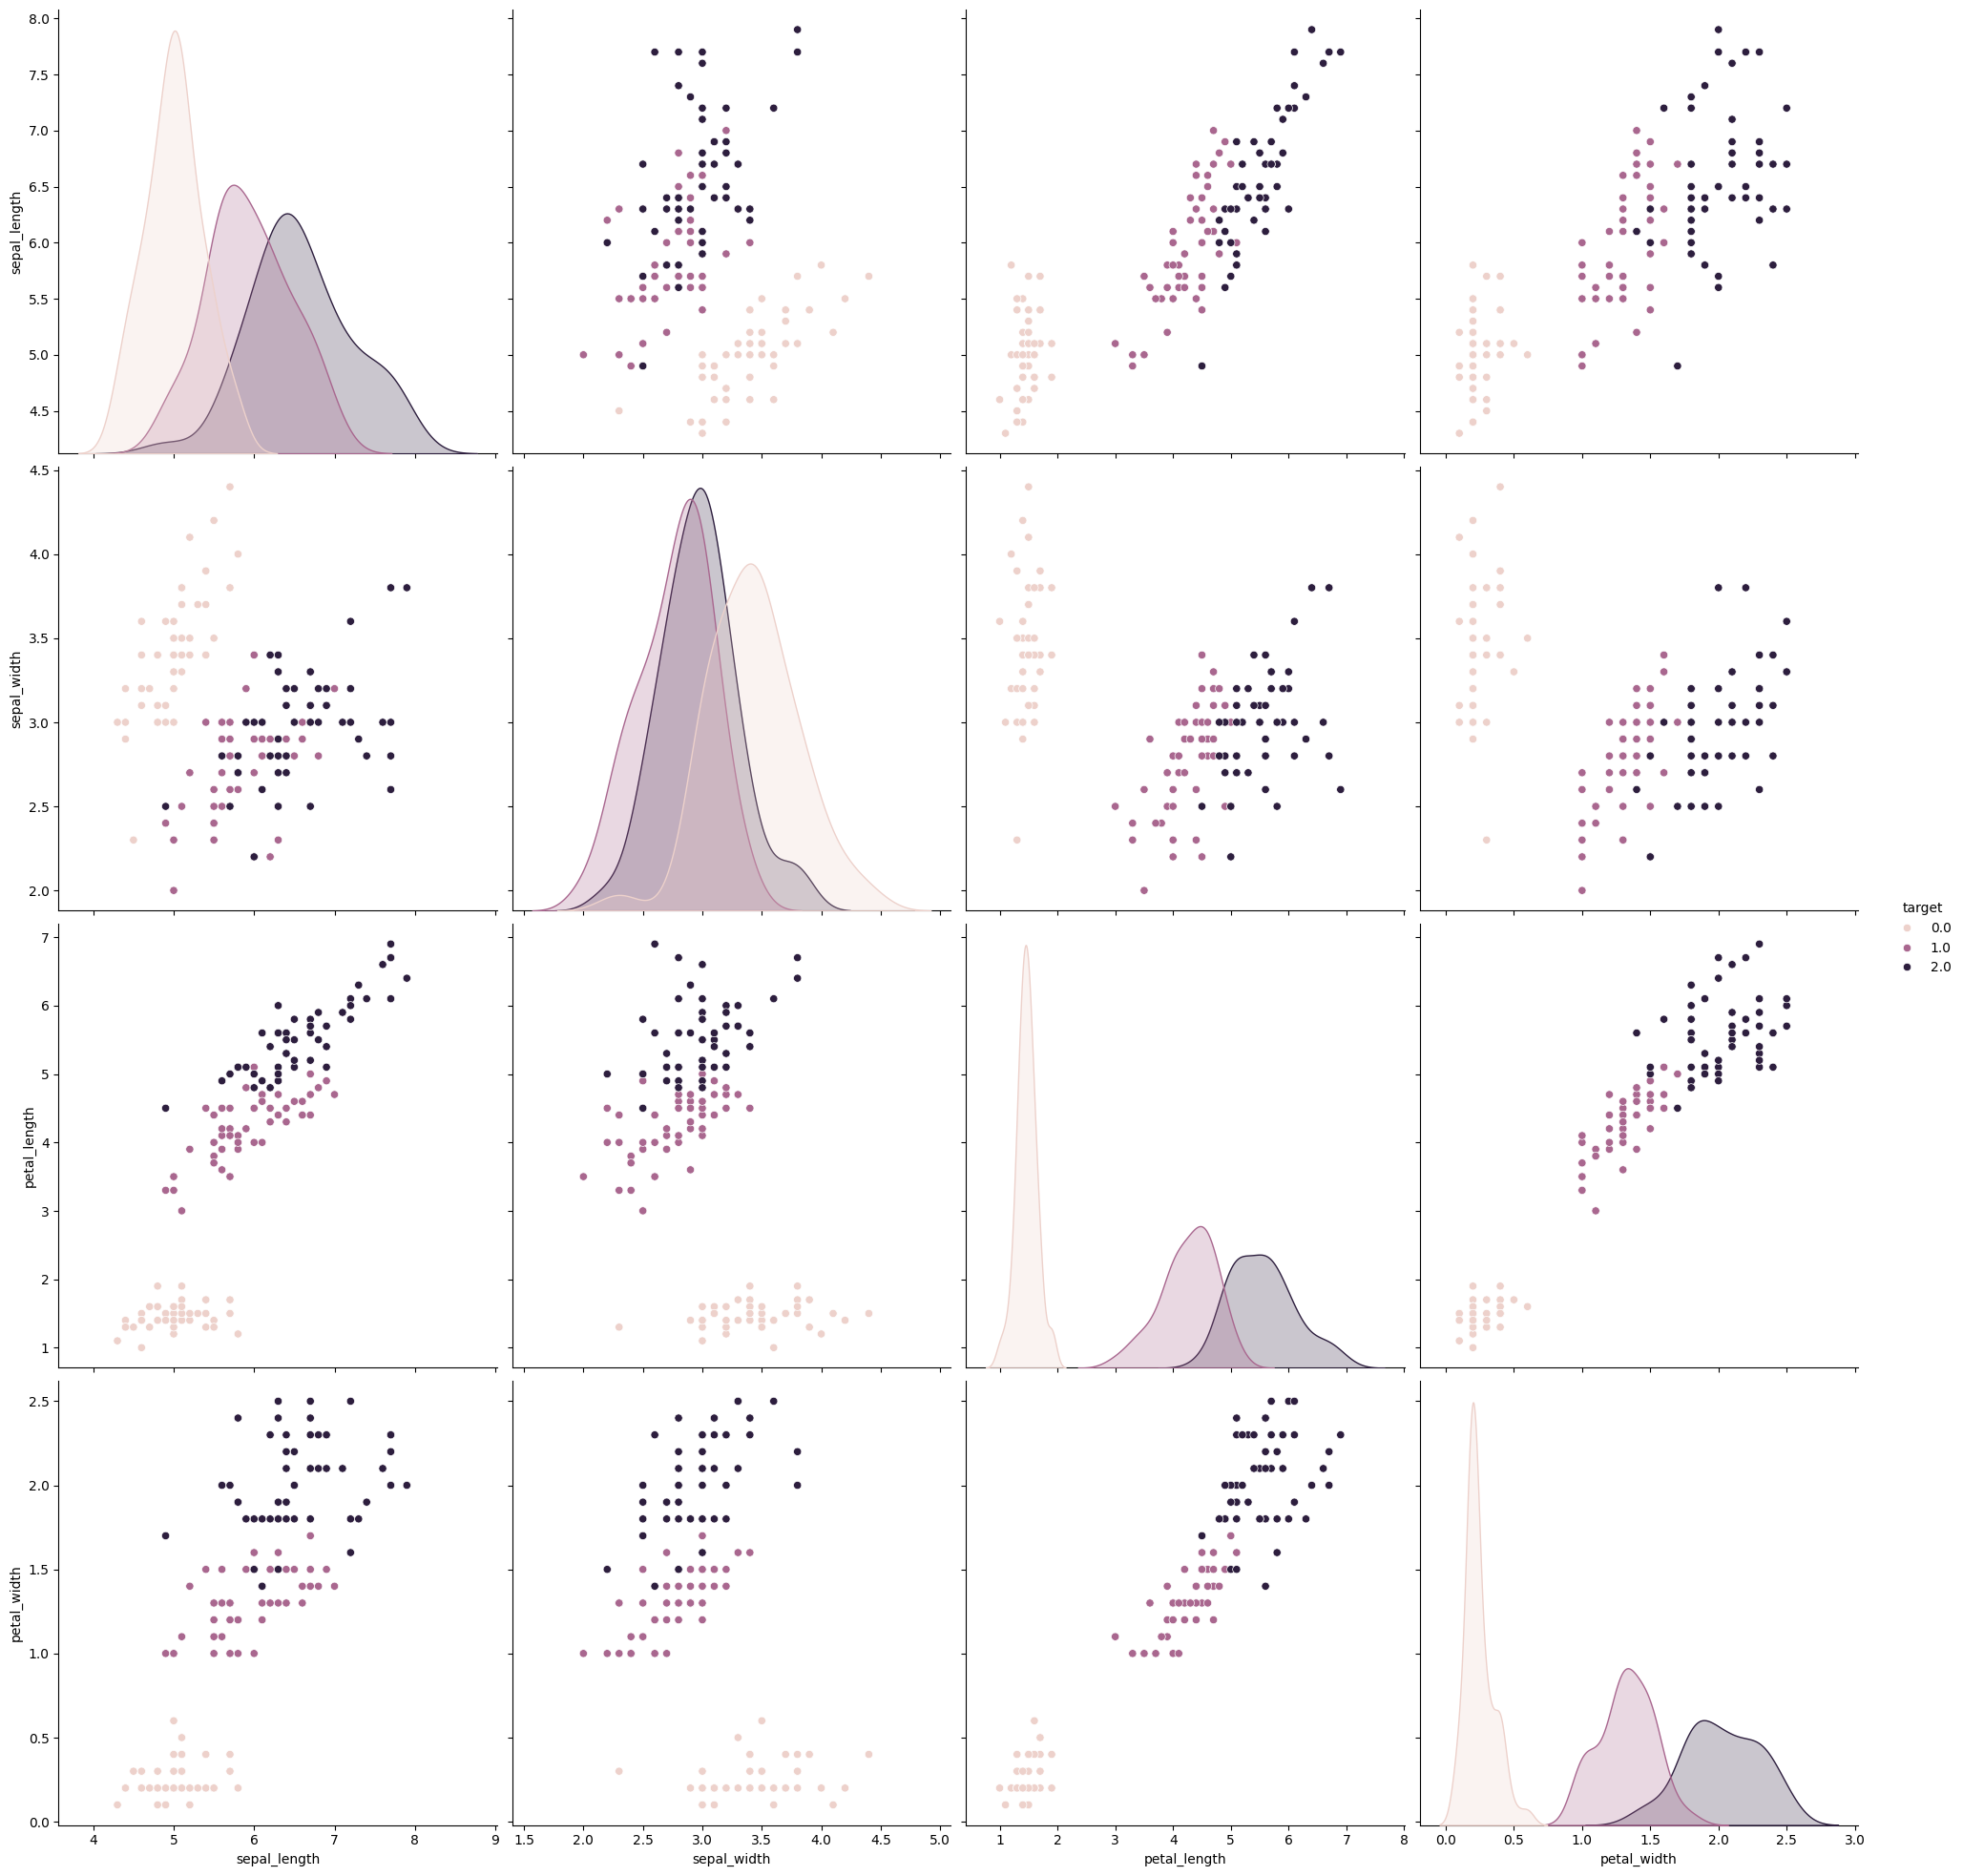

In [52]:
sns.pairplot(df, hue = "target", height = 5)

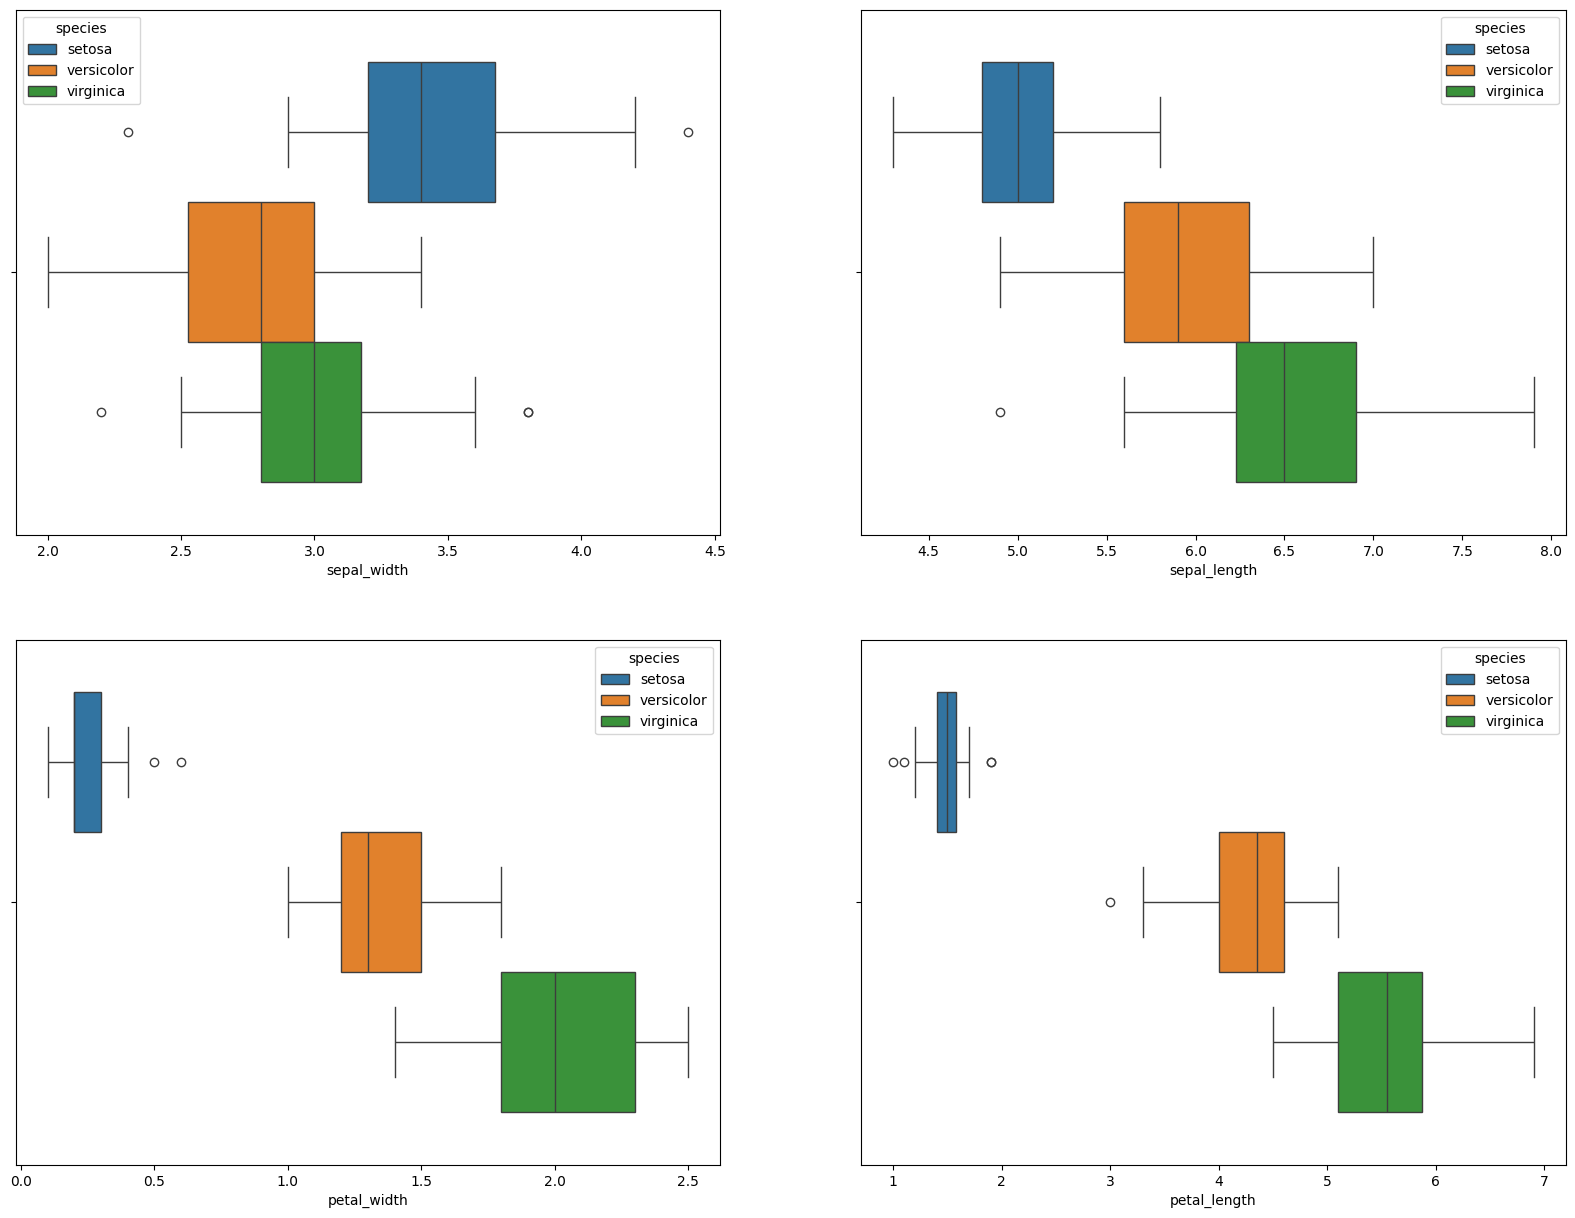

In [53]:
fig, axs= plt.subplots(2,2, figsize=(20,15))
sns.boxplot(data=df, x='sepal_width', hue='species', ax=axs[0,0])
sns.boxplot(data=df, x='sepal_length', hue='species', ax=axs[0,1])
sns.boxplot(data=df, x='petal_width', hue='species', ax=axs[1,0])
sns.boxplot(data=df, x='petal_length', hue='species', ax=axs[1,1])
plt.show()

# CORRELATION

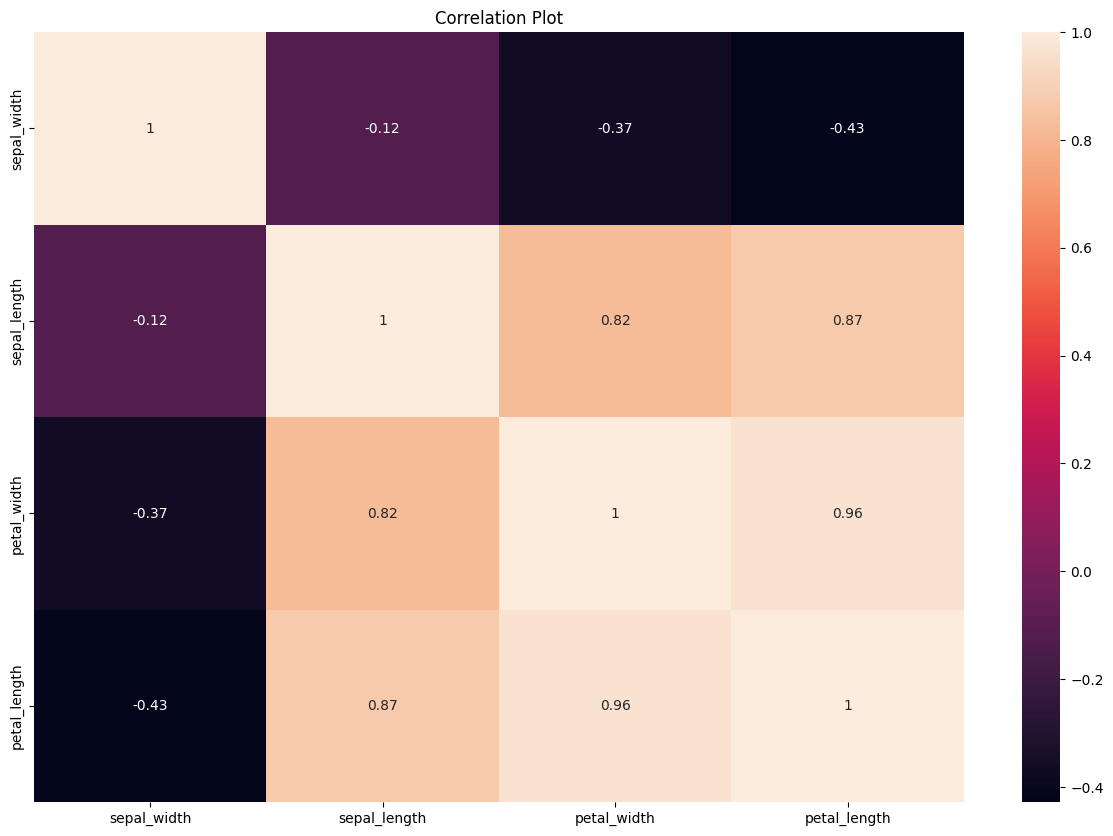

In [54]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(df[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']].corr(method='pearson', min_periods=1),annot=True)
# save the plot
plt.title('Correlation Plot')
plt.show()

# Data Preprocessing
## Pemisahan Features (X) dan Target (Y)

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [56]:
X = df.drop(["target", "species"], axis = 1)
y = df["target"]
print(X.shape, y.shape)

(150, 4) (150,)


In [57]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

## Split Data Training dan Testing
memotong data sample menjadi 2 bagian dengan rasio 0.8 dan 0.2

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (120, 4) Y (120,)
Data Test: X (30, 4) Y (30,)


# Model Development
## Training Model


# SVC

In [86]:
model_svm=SVC(kernel='rbf', decision_function_shape='ovr')
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)
y_pred=model_svm.predict(X_test)
reportsvc=classification_report(y_test, y_pred, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, model_svm.predict(X_test)))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Confusion Matrix')

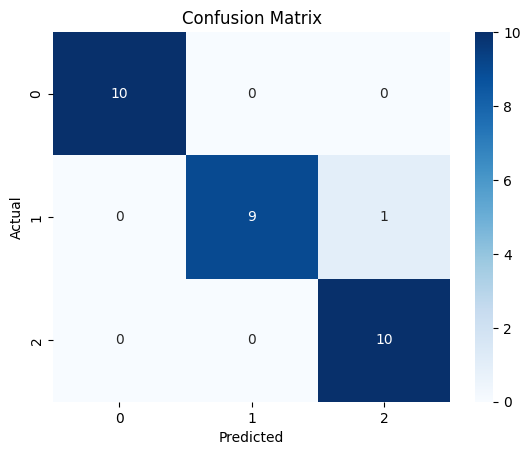

In [89]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# DECISION TREE

In [90]:
# Proses training model
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5)
dt.fit(X_train, y_train)

### Memprediksi data testing yang sudah di siapkan
y_pred = dt.predict(X_test)

#classification report
reportdt=classification_report(y_test, y_pred, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      0.90      0.90        10
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Text(0.5, 1.0, 'Confusion Matrix')

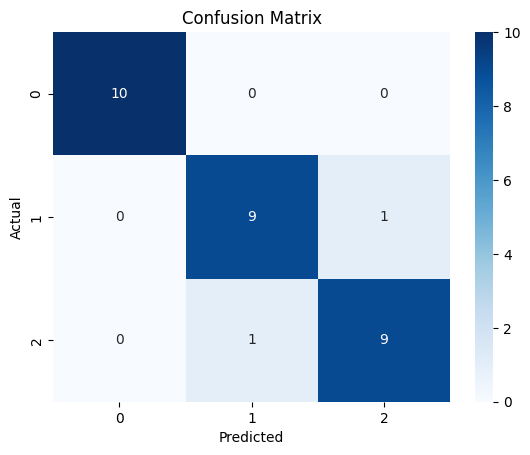

In [91]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# LOGISTIC REGRESSION

In [92]:
logit = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, penalty='l2')
logit.fit(X_train,y_train)
# Predict probabilities for the test set
y_probs = logit.predict(X_test)

# Convert probabilities to classes based on a threshold
y_pred=np.rint(y_probs)

# Classification report
reportlogit = classification_report(y_test, y_pred, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



d:\pythonapps\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix')

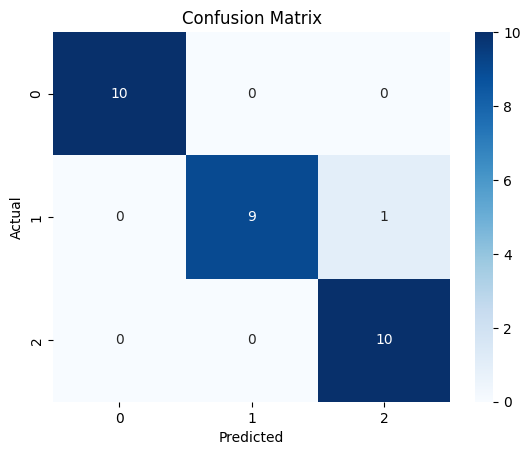

In [93]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# RANDOM FOREST

In [94]:
rf = RandomForestClassifier(
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=20,
                                       min_samples_leaf=8,
                                       random_state = 123)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Classification report
reportrf = classification_report(y_test, y_pred, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      0.90      0.90        10
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Text(0.5, 1.0, 'Confusion Matrix')

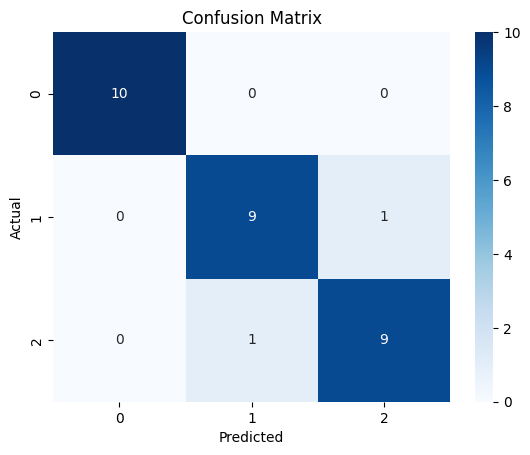

In [95]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# NAIVE BAYES

In [105]:
# Proses training model
nb_mod = GaussianNB()
nb_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = nb_mod.predict(X_test)

### Evaluasi hasil prediksi data training
reportnb = classification_report(y_test, y_pred, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Confusion Matrix')

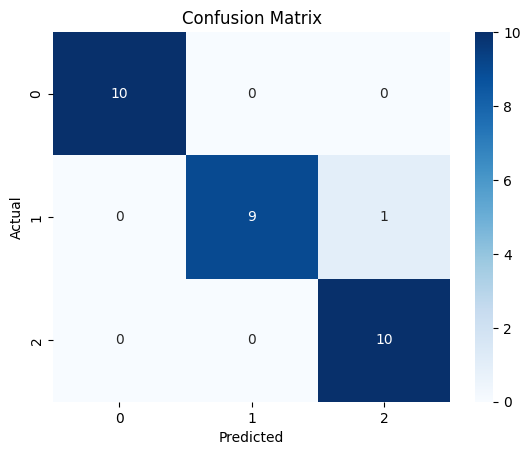

In [99]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# KNN

In [106]:
# Proses training model
knn_mod = KNeighborsClassifier()
knn_mod.fit(X_train, y_train)

### Memprediksi data training kembali dengan model yang dikembangkan
y_pred = knn_mod.predict(X_test)

### Evaluasi hasil prediksi data training
reportknn = classification_report(y_test, y_pred, output_dict=True)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix')

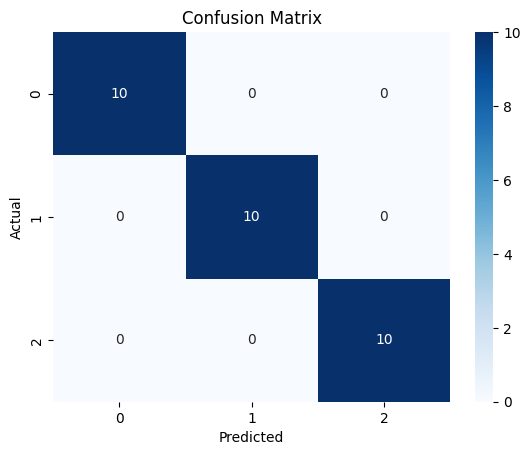

In [101]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [107]:
combine_table=pd.DataFrame({
    'accuracy': [reportsvc['accuracy'], 
                 reportdt['accuracy'],
                 reportlogit['accuracy'],
                 reportrf['accuracy'],
                 reportnb['accuracy'],
                 reportknn['accuracy']
                 ],
    'precision':[
                reportsvc['weighted avg']['precision'], 
                reportdt['weighted avg']['precision'],
                 reportlogit['weighted avg']['precision'], 
                 reportrf['weighted avg']['precision'],  
                 reportnb['weighted avg']['precision'], 
                 reportknn['weighted avg']['precision'] 
    ],
    'recall':[
                reportsvc['weighted avg']['recall'], 
                 reportdt['weighted avg']['recall'],
                 reportlogit['weighted avg']['recall'],
                 reportrf['weighted avg']['recall'],
                 reportnb['weighted avg']['recall'],
                 reportknn['weighted avg']['recall']
    ],
    'f1-score':[
               reportsvc['weighted avg']['f1-score'], 
                 reportdt['weighted avg']['f1-score'],
                 reportlogit['weighted avg']['f1-score'], 
                 reportrf['weighted avg']['f1-score'], 
                 reportnb['weighted avg']['f1-score'], 
                 reportknn['weighted avg']['f1-score']
    ]
    }, index=['support vector classifier', 'decision tree', 'logistic regression', 'random forest',
              'naive bayes', 'k-nearest neigbors classifier'])


combine_table=combine_table.astype(float)
combine_table.map('{:.2%}'.format)

,accuracy,precision,recall,f1-score
support vector classifier,96.67%,96.97%,96.67%,96.66%
decision tree,93.33%,93.33%,93.33%,93.33%
logistic regression,96.67%,96.97%,96.67%,96.66%
random forest,93.33%,93.33%,93.33%,93.33%
naive bayes,96.67%,96.97%,96.67%,96.66%
k-nearest neigbors classifier,100.00%,100.00%,100.00%,100.00%
